Number of points 45
Points detected : [(8, 319), (9, 320), (10, 321), (16, 329), (16, 330), (19, 334), (19, 335), (27, 345), (31, 349), (31, 350), (35, 353), (74, 353), (74, 354), (74, 355), (75, 354), (75, 355), (97, 354), (97, 355), (109, 351), (109, 352), (109, 353), (109, 354), (109, 355), (145, 284), (148, 346), (157, 351), (157, 352), (158, 352), (158, 353), (158, 354), (158, 355), (159, 353), (159, 354), (159, 355), (160, 354), (160, 355), (161, 355), (165, 353), (165, 354), (166, 340), (188, 355), (193, 355), (198, 355), (199, 355), (206, 355)]

Number of points 581
Points detected [(2, 477), (2, 478), (2, 479), (2, 480), (2, 481), (2, 482), (3, 479), (3, 480), (3, 481), (3, 482), (3, 483), (3, 484), (4, 484), (4, 485), (4, 486), (5, 481), (5, 482), (5, 483), (5, 484), (6, 487), (6, 488), (6, 489), (6, 490), (7, 486), (7, 487), (7, 488), (7, 489), (7, 490), (7, 491), (8, 486), (8, 487), (8, 488), (8, 489), (8, 490), (8, 491), (8, 492), (8, 493), (9, 487), (9, 488), (9, 489), (9

[(138, 22), (425, 22), (425, 284), (138, 284)]


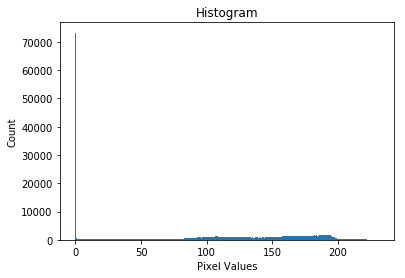

In [35]:
import numpy as np
import math as math
from cv2 import imread, imwrite, cvtColor, COLOR_GRAY2RGB, putText, FONT_HERSHEY_SIMPLEX, LINE_AA
from Utilities import sharpen, blur
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt


def displayImage(img, outputName):
    imwrite('outputImages/'+outputName+'.jpg', img)
    return 1

pointimgPath = './point.jpg'
pointimgPath1 = './point_HQ.jpg'
segmentimg = './segment.jpg'
threshold = [747, 1274, 1815]
kernel1 = np.array(
                    [[-1,-1,-1],
                     [-1,8,-1],
                     [-1,-1,-1]])
kernel = np.array(
                    [[-1,-1,-1,-1,-1],
                    [-1,-1,-1,-1,-1],
                    [-1,-1,8,-1,-1],
                    [-1,-1,-1,-1,-1],
                    [-1,-1,-1,-1,-1]])

def main():
    # task 2a with original given image
    pointimg = imread(pointimgPath, 0)
    imgAL, imgAW = pointimg.shape
    finalImage = np.zeros((imgAL, imgAW))
    count = 0
    pts = []
    for i in range(1, imgAL-1):
        for j in range(1, imgAW-1):
            S = pointimg[i-1,j-1] * kernel1[0,0] + pointimg[i-1,j] * kernel1[0,1] + pointimg[i-1,j+1] * kernel1[0,2]
            + pointimg[i,j-1] * kernel1[1,0] + pointimg[i,j] * kernel1[1,1] + pointimg[i,j+1] * kernel1[1,2]
            + pointimg[i+1,j-1] * kernel1[2,0] + pointimg[i+1,j] * kernel1[2,1] + pointimg[i+1,j+1] * kernel1[2,2]
            if (abs(S)>threshold[0]):
                count = count + 1
                finalImage[i,j]=255
                pts.append((i, j))
    writeImage(finalImage, 'Task2A_1')
    print("Number of points", count)
    print("Points detected : "+str(pts))
    print()
    #Image with better quality for task 2a
    pointimg = imread(pointimgPath1, 0)
    imgAL, imgAW = pointimg.shape
    finalImage = np.zeros((imgAL, imgAW))
    count = 0
    pts = []
    for i in range(2, imgAL-2):
        for j in range(2, imgAW-2):
            S = pointimg[i-2,j-2] * kernel[0,0] + pointimg[i-2,j-1] * kernel[0,1] + pointimg[i-2,j] * kernel[0,2] + pointimg[i-2,j+1] * kernel[0,3] + pointimg[i-2,j+2] * kernel[0,4] 
            + pointimg[i-1,j-2] * kernel[1,0] + pointimg[i-1,j-1] * kernel[1,1] + pointimg[i-1,j] * kernel[1,2] + pointimg[i-1,j+1] * kernel[1,3] + pointimg[i-1,j+2] * kernel[1,4] 
            + pointimg[i,j-2] * kernel[2,0] + pointimg[i,j-1] * kernel[2,1] + pointimg[i,j] * kernel[2,2] + pointimg[i,j+1] * kernel[2,3] + pointimg[i,j+2] * kernel[2,4]
            + pointimg[i+1,j-2] * kernel[3,0] + pointimg[i+1,j-1] * kernel[3,1] + pointimg[i+1,j] * kernel[3,2] + pointimg[i+1,j+1] * kernel[3,3] + pointimg[i+1,j+2] * kernel[3,4] 
            + pointimg[i+2,j-2] * kernel[4,0] + pointimg[i+2,j-1] * kernel[4,1] + pointimg[i+2,j] * kernel[4,2] + pointimg[i+2,j+1] * kernel[4,3] + pointimg[i+2,j+2] * kernel[4,4]
            if (abs(S)>threshold[1]):
                count = count + 1
                finalImage[i,j]=255
                pts.append((i, j))
    displayImage(finalImage, 'Task2A_2')
    print("Number of points", count)
    print("Points detected "+str(pts))
    print()
    # image with image sharpening for task 2a
    pointimg = imread(pointimg1, 0)
    pointimg = np.pad(pointimg, [(2, 2), (2, 2)], mode='constant', constant_values=0)
    pointimg = sharpen(pointimg)
    imgAL, imgAW = pointimg.shape
    finalImage = np.zeros((imgAL, imgAW))
    count = 0
    pts = []
    for i in range(2, imgAL-2):
        for j in range(2, imgAW-2):
            S = pointimg[i-2,j-2] * kernel[0,0] + pointimg[i-2,j-1] * kernel[0,1] + pointimg[i-2,j] * kernel[0,2] + pointimg[i-2,j+1] * kernel[0,3] + pointimg[i-2,j+2] * kernel[0,4] + pointimg[i-1,j-2] * kernel[1,0]
            + pointimg[i-1,j-1] * kernel[1,1] + pointimg[i-1,j] * kernel[1,2] + pointimg[i-1,j+1] * kernel[1,3] + pointimg[i-1,j+2] * kernel[1,4] + pointimg[i,j-2] * kernel[2,0] + pointimg[i,j-1] * kernel[2,1] 
            + pointimg[i,j] * kernel[2,2] + pointimg[i,j+1] * kernel[2,3] + pointimg[i,j+2] * kernel[2,4] + pointimg[i+1,j-2] * kernel[3,0] + pointimg[i+1,j-1] * kernel[3,1] + pointimg[i+1,j] * kernel[3,2]
            + pointimg[i+1,j+1] * kernel[3,3] + pointimg[i+1,j+2] * kernel[3,4] + pointimg[i+2,j-2] * kernel[4,0] 
            + pointimg[i+2,j-1] * kernel[4,1] + pointimg[i+2,j] * kernel[4,2] + pointimg[i+2,j+1] * kernel[4,3]
            + pointimg[i+2,j+2] * kernel[4,4]
            if (abs(S)>threshold[2]):
                count = count + 1
                finalImage[i,j]=255
                pts.append((i, j))
    for pt in pts:
        if (pt==(254,447)):
            putText(finalImage, str((447,254)), (435,240), FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), lineType=LINE_AA)
    displayImage(finalImage, 'Task2A_3')
    print("Number of points", count)
    print("Points detected : "+str(pts))
    print()


  
    segmentimg1 = imread(segmentimg, 0)
    finalImage = segmentimg1.copy()
    segmentimgL, segmentimgW = segmentimg1.shape
    unique, counts = np.unique(segmentimg1, return_counts=True)
    fig, ax = plt.subplots()
    ax.bar(unique, counts, 1)
    plt.xlabel('Pixel Values')
    plt.ylabel('Count')
    plt.title('Histogram')
    fig.savefig('outputImages/Task2B_Histogram.png')
    S_threshold = 200
    for i in range(0, segmentimgL):
        for j in range(0, segmentimgW):
            if (segmentimg1[i,j]<S_threshold):
                finalImage[i,j]=0
    minX=None; maxX=None
    minY=None; maxY=None
    x=[]
    y=[]
    for i in range(0, segmentimgL):
        for j in range(0, segmentimgW):
            if (segmentimg1[i,j]>S_threshold):
                x.append(j)
                y.append(i)
    x=np.array(x)
    y=np.array(y)
    minX = np.amin(x)
    maxX = np.amax(x)
    minY = np.amin(y)
    maxY = np.amax(y)
    pts = [(minX, minY),(maxX, minY),(maxX, maxY),(minX, maxY)]
    print(pts)
    finalImage[minY:maxY, minX] = 255
    finalImage[minY:maxY, maxX] = 255
    finalImage[minY, minX:maxX] = 255
    finalImage[maxY, minX:maxX] = 255
    displayImage(finalImage, 'Task2B_Image')
    putText(finalImage,str((minX, minY)), (minX, minY), FONT_HERSHEY_SIMPLEX, 1.0, (255, 255, 255), lineType=LINE_AA)
    putText(finalImage,str((maxX, minY)), (maxX, minY), FONT_HERSHEY_SIMPLEX, 1.0, (255, 255, 255), lineType=LINE_AA)
    putText(finalImage,str((maxX, maxY)), (maxX, maxY), FONT_HERSHEY_SIMPLEX, 1.0, (255, 255, 255), lineType=LINE_AA)
    putText(finalImage,str((minX, maxY)), (minX, maxY), FONT_HERSHEY_SIMPLEX, 1.0, (255, 255, 255), lineType=LINE_AA)
    color = cvtColor(segmentimg1, COLOR_GRAY2RGB)
    color[minY:maxY, minX, 0] = 0; color[minY:maxY, minX, 1] = 0; color[minY:maxY, minX, 2] = 255
    color[minY:maxY, maxX, 0] = 0; color[minY:maxY, maxX, 1] = 0; color[minY:maxY, maxX, 2] = 255
    color[minY, minX:maxX, 0] = 0; color[minY, minX:maxX, 1] = 0; color[minY, minX:maxX, 2] = 255
    color[maxY, minX:maxX, 0] = 0; color[maxY, minX:maxX, 1] = 0; color[maxY, minX:maxX, 2] = 255
    putText(color,str((minX, minY)), (minX, minY), FONT_HERSHEY_SIMPLEX, 1.0, (255, 255, 255), lineType=LINE_AA)
    putText(color,str((maxX, minY)), (maxX, minY), FONT_HERSHEY_SIMPLEX, 1.0, (255, 255, 255), lineType=LINE_AA)
    putText(color,str((maxX, maxY)), (maxX, maxY), FONT_HERSHEY_SIMPLEX, 1.0, (255, 255, 255), lineType=LINE_AA)
    putText(color,str((minX, maxY)), (minX, maxY), FONT_HERSHEY_SIMPLEX, 1.0, (255, 255, 255), lineType=LINE_AA)
    displayImage(color, 'Task2B_FinalImage')


main()